In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (6)\DailyDelhiClimateTrain.csv")

In [6]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [10]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Acer\Downloads\archive (6)\DailyDelhiClimateTrain.csv",
    usecols=['date', 'humidity'],         
    parse_dates=['date'],                       
    index_col='date'                            
)


In [11]:
X=df.values
print('Shape of data /t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data /t (1462, 1)
Original Dataset:
              humidity
date                 
2013-01-01  84.500000
2013-01-02  92.000000
2013-01-03  87.000000
2013-01-04  71.333333
2013-01-05  86.833333
After Extracting only temperatures:
 [[ 84.5       ]
 [ 92.        ]
 [ 87.        ]
 ...
 [ 89.66666667]
 [ 87.        ]
 [100.        ]]


<Axes: xlabel='date'>

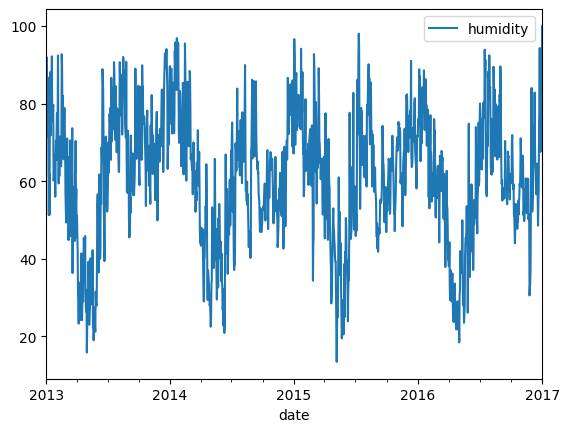

In [12]:
df.plot()

<Axes: xlabel='date'>

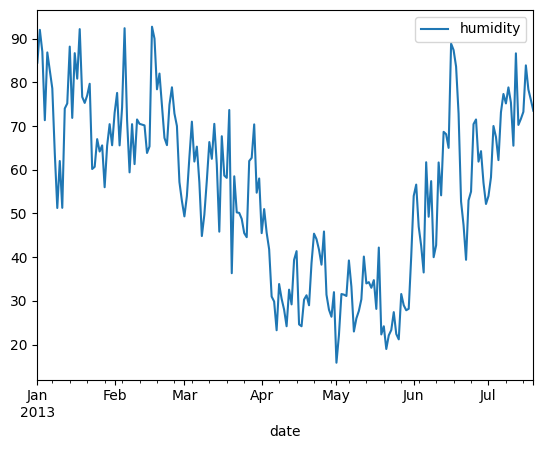

In [13]:
df[:200].plot()

# ADF TEST

In [14]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['humidity'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Usd for ADF Regression andd critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -3.675576919163336
2. P-Value : 0.0044701004781308035
3. Num Of Lags :  15
4. Num Of Observations Usd for ADF Regression andd critical values Calculation :  1446
5. Critical Values : 
	 1% :  -3.434880391815318
	 5% :  -2.8635408625359315
	 10% :  -2.5678352438452814


In [15]:
# Converting p-value from Scientific to Decimal Notation

p_value = 2.0711213788806855e-11
print(f"p-value: {p_value:.15f}")


p-value: 0.000000000020711


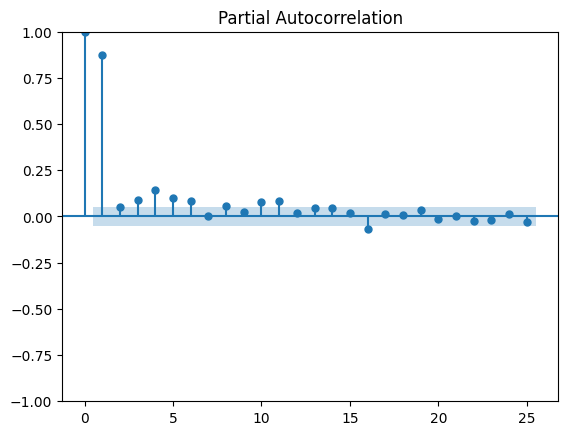

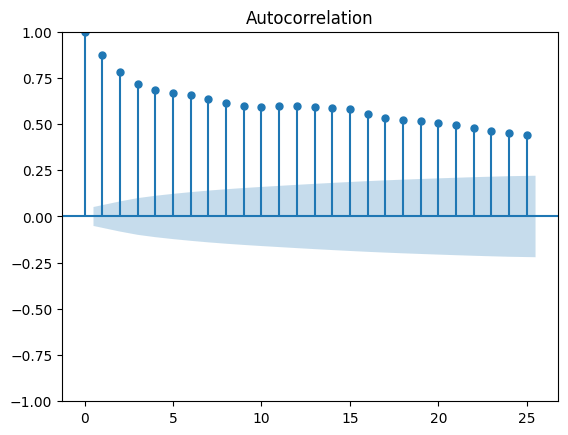

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['humidity'],lags=25)
acf=plot_acf(df['humidity'],lags=25)

# split data

In [18]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [19]:
print(train)
print(test)

[[84.5       ]
 [92.        ]
 [87.        ]
 ...
 [74.7       ]
 [78.63636364]
 [94.3       ]]
[[ 74.85714286]
 [ 67.55      ]
 [ 68.04347826]
 [ 87.85714286]
 [ 89.66666667]
 [ 87.        ]
 [100.        ]]


In [20]:
model=AutoReg(train,lags=10)

In [21]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1455
Model:                    AutoReg(10)   Log Likelihood               -5005.068
Method:               Conditional MLE   S.D. of innovations              7.727
Date:                Thu, 10 Apr 2025   AIC                          10034.136
Time:                        12:42:28   BIC                          10097.446
Sample:                            10   HQIC                         10057.765
                                 1455                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7182      0.874      4.255      0.000       2.005       5.431
y.L1           0.7892      0.026     30.035      0.000       0.738       0.841
y.L2          -0.0278      0.033     -0.831      0.4

# Make Predictioned on Test Set and Compare

In [23]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

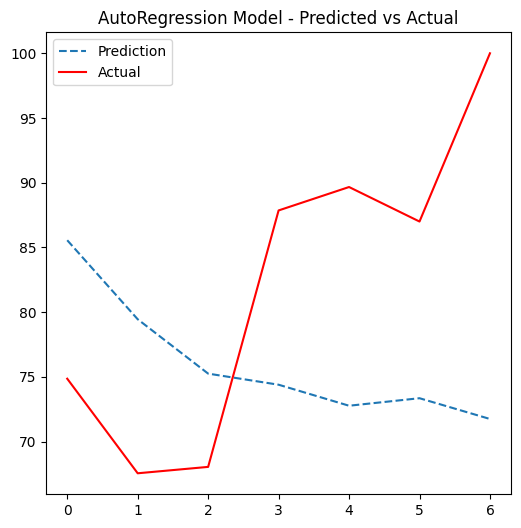

[85.55596844 79.45037058 75.24961708 74.39241218 72.76841698 73.34944865
 71.74548705]


In [24]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(6,6))
plt.plot(pred, label='Prediction', linestyle='dashed')
plt.plot(test, label='Actual', linestyle='solid', color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show() 

# Print predicted values
print(pred)

# calculate error

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

# Print error values
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 14.581911379641117
MSE: 251.3595706775869
RMSE: 15.854323406490323


# Making Future Prediction

In [27]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))

The Future prediction for the next week
[72.29765921 71.77370765 72.89156793 72.94652091 72.71992673 71.9439745
 71.53493523]
Number of Prediction Made: 7


In [28]:
print('Number of Predictions Made:', len(pred_future))

Number of Predictions Made: 7
